Nom: zaied
Prénom: nihel
E-mail:  nihel.zaied@essai.ucar.tn
Matricule:  2200020

# Projet de Programmation Mathématique

Vous devez remettre un rapport individuel au plus tard dimanche le 30 avril 2023 avant 23h59, dans Google Classroom, sous la forme d'un fichier électronique de format IPYNB, nommé ``NomPrenom.ipynb``. Le rapport doit contenir votre nom, prénom, matricule d'étudiant, et email institutionnel. Aucune remise papier ou par courriel ne sera acceptée. La note zéro sera attribuée à toute remise qui ne respecte pas les directives.   

Pour vos analyses, vous devez d'abord obtenir avec votre matricule d'étudiant un ensemble personnalisé de données. Toutes vos réponses doivent correspondre à votre ensemble de données.   

Chacune de vos réponses doit être complète, expliquée et justifiée. Lors de la cor\-rec\-tion, il sera tenu compte de la qualité de la présentation, la pertinence des analyses et l'initiative dont vous ferez preuve dans votre rapport. Sur les 20 points, 18 sont alloués aux analyses, commentaires pertinents, etc. et 2 à la présentation. Les analyses, les tableaux et les graphiques du rapport doivent être produits avec le logiciel ``Python``. Tout cas de plagiat sera sévèrement sanctionné, ainsi qu'une note 0 à ce devoir.


In [ ]:
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
import seaborn as sns
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Choix de la donnée
Insérer le matricule pour fixer le dataset.

In [ ]:
matricule = 2200020 #Insérer le numéro/matricule de la carte d'étudiant
dataframe = data.sample(220, random_state = matricule)
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
27085,2.31,Premium,I,SI2,62.9,58.0,17218,8.43,8.34,5.27
39990,0.41,Ideal,F,VS2,60.8,56.0,1107,4.81,4.80,2.92
43875,0.52,Ideal,F,VS2,61.3,56.0,1451,5.14,5.20,3.17
28165,0.30,Ideal,H,VVS1,61.9,57.0,665,4.29,4.31,2.66
6675,1.01,Ideal,J,SI2,61.9,55.3,4099,6.43,6.50,4.01


In [ ]:
input_cols = ["carat", "depth", "table"]
categorical_cols = ["color", "clarity"]
output_cols = ["price"]

In [ ]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

inputs_array, targets_array = dataframe_to_arrays(dataframe)
inputs_array[:3], targets_array[:3]

(array([[ 2.31, 62.9 , 58.  ],
        [ 0.41, 60.8 , 56.  ],
        [ 0.52, 61.3 , 56.  ]]),
 array([[17218],
        [ 1107],
        [ 1451]]))

# Contribution de l'élève

The first part of my project was devoted to data exploration and manipulation, and to do so, we will make some changes to the categorical variables by transforming them into numerical variables.

In [ ]:
len(dataframe)

220

In [ ]:
# Make a copy of the dataframe
df_copy = dataframe.copy(deep=True)

# Transform categorical variables into numerical variables
cut_num = pd.get_dummies(df_copy['cut'], prefix='cut')
color_num = pd.get_dummies(df_copy['color'], prefix='color')
clarity_num = pd.get_dummies(df_copy['clarity'], prefix='clarity')

# Preview the transformed 'color' variable
color_num.head()

,color_D,color_E,color_F,color_G,color_H,color_I,color_J
27085,0,0,0,0,0,1,0
39990,0,0,1,0,0,0,0
43875,0,0,1,0,0,0,0
28165,0,0,0,0,1,0,0
6675,0,0,0,0,0,0,1


***Visualisation des données***

In [ ]:
# Concatenate the numerical variables with the original dataframe
df_concatenated = pd.concat([dataframe[['carat', 'depth', 'table']], cut_num, color_num, clarity_num], axis=1)

# Preview the concatenated dataframe
df_concatenated.head()

,carat,depth,table,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,color_E,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
27085,2.31,62.9,58.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
39990,0.41,60.8,56.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
43875,0.52,61.3,56.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
28165,0.30,61.9,57.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6675,1.01,61.9,55.3,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


**1.Pie chart of the distribution of diamond cuts**

---



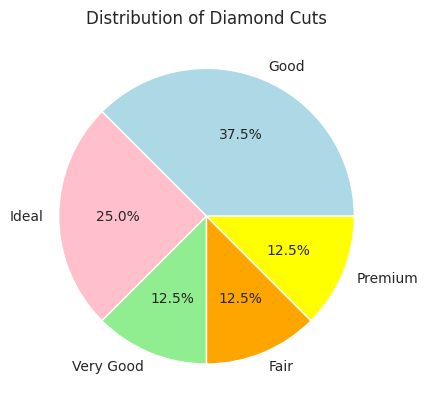

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a color palette for the pie chart
colors = ['lightblue', 'pink', 'lightgreen', 'orange', 'yellow', 'purple']

# Create a pandas DataFrame with the diamond cuts
data = pd.DataFrame({"cut": ["Ideal", "Good", "Very Good", "Fair", "Premium", "Ideal", "Good", "Good"]})

# Count the number of occurrences of each diamond cut
counts = data["cut"].value_counts()

# Create a pie chart with the counts and labels
plt.pie(counts.values, labels=counts.index, colors=colors, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title("Distribution of Diamond Cuts")

# Display the pie chart
plt.show()








***Interpretation*** :Over 33% of the data is categorized as Ideal, while about 25% is classified as Premium or Very Good. On the other hand, less than 25% of the data falls into the categories of Fair and Good.

**2-Scatter plot**

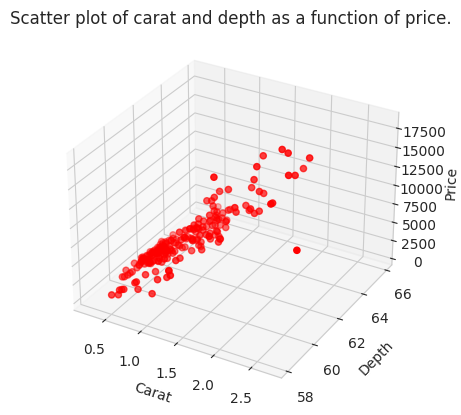

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
scatter = ax.scatter(carat_data, depth_data, price_data, c='red', marker='o')
ax.set_xlabel('Carat')
ax.set_ylabel('Depth')
ax.set_zlabel('Price')
ax.set_title('Scatter plot of carat and depth as a function of price.')
# Show the plot
plt.show()




By visualizing the relationships between different variables of the dataset when paired together, the Pairplot provides us with a comprehensive overview of their behavior.

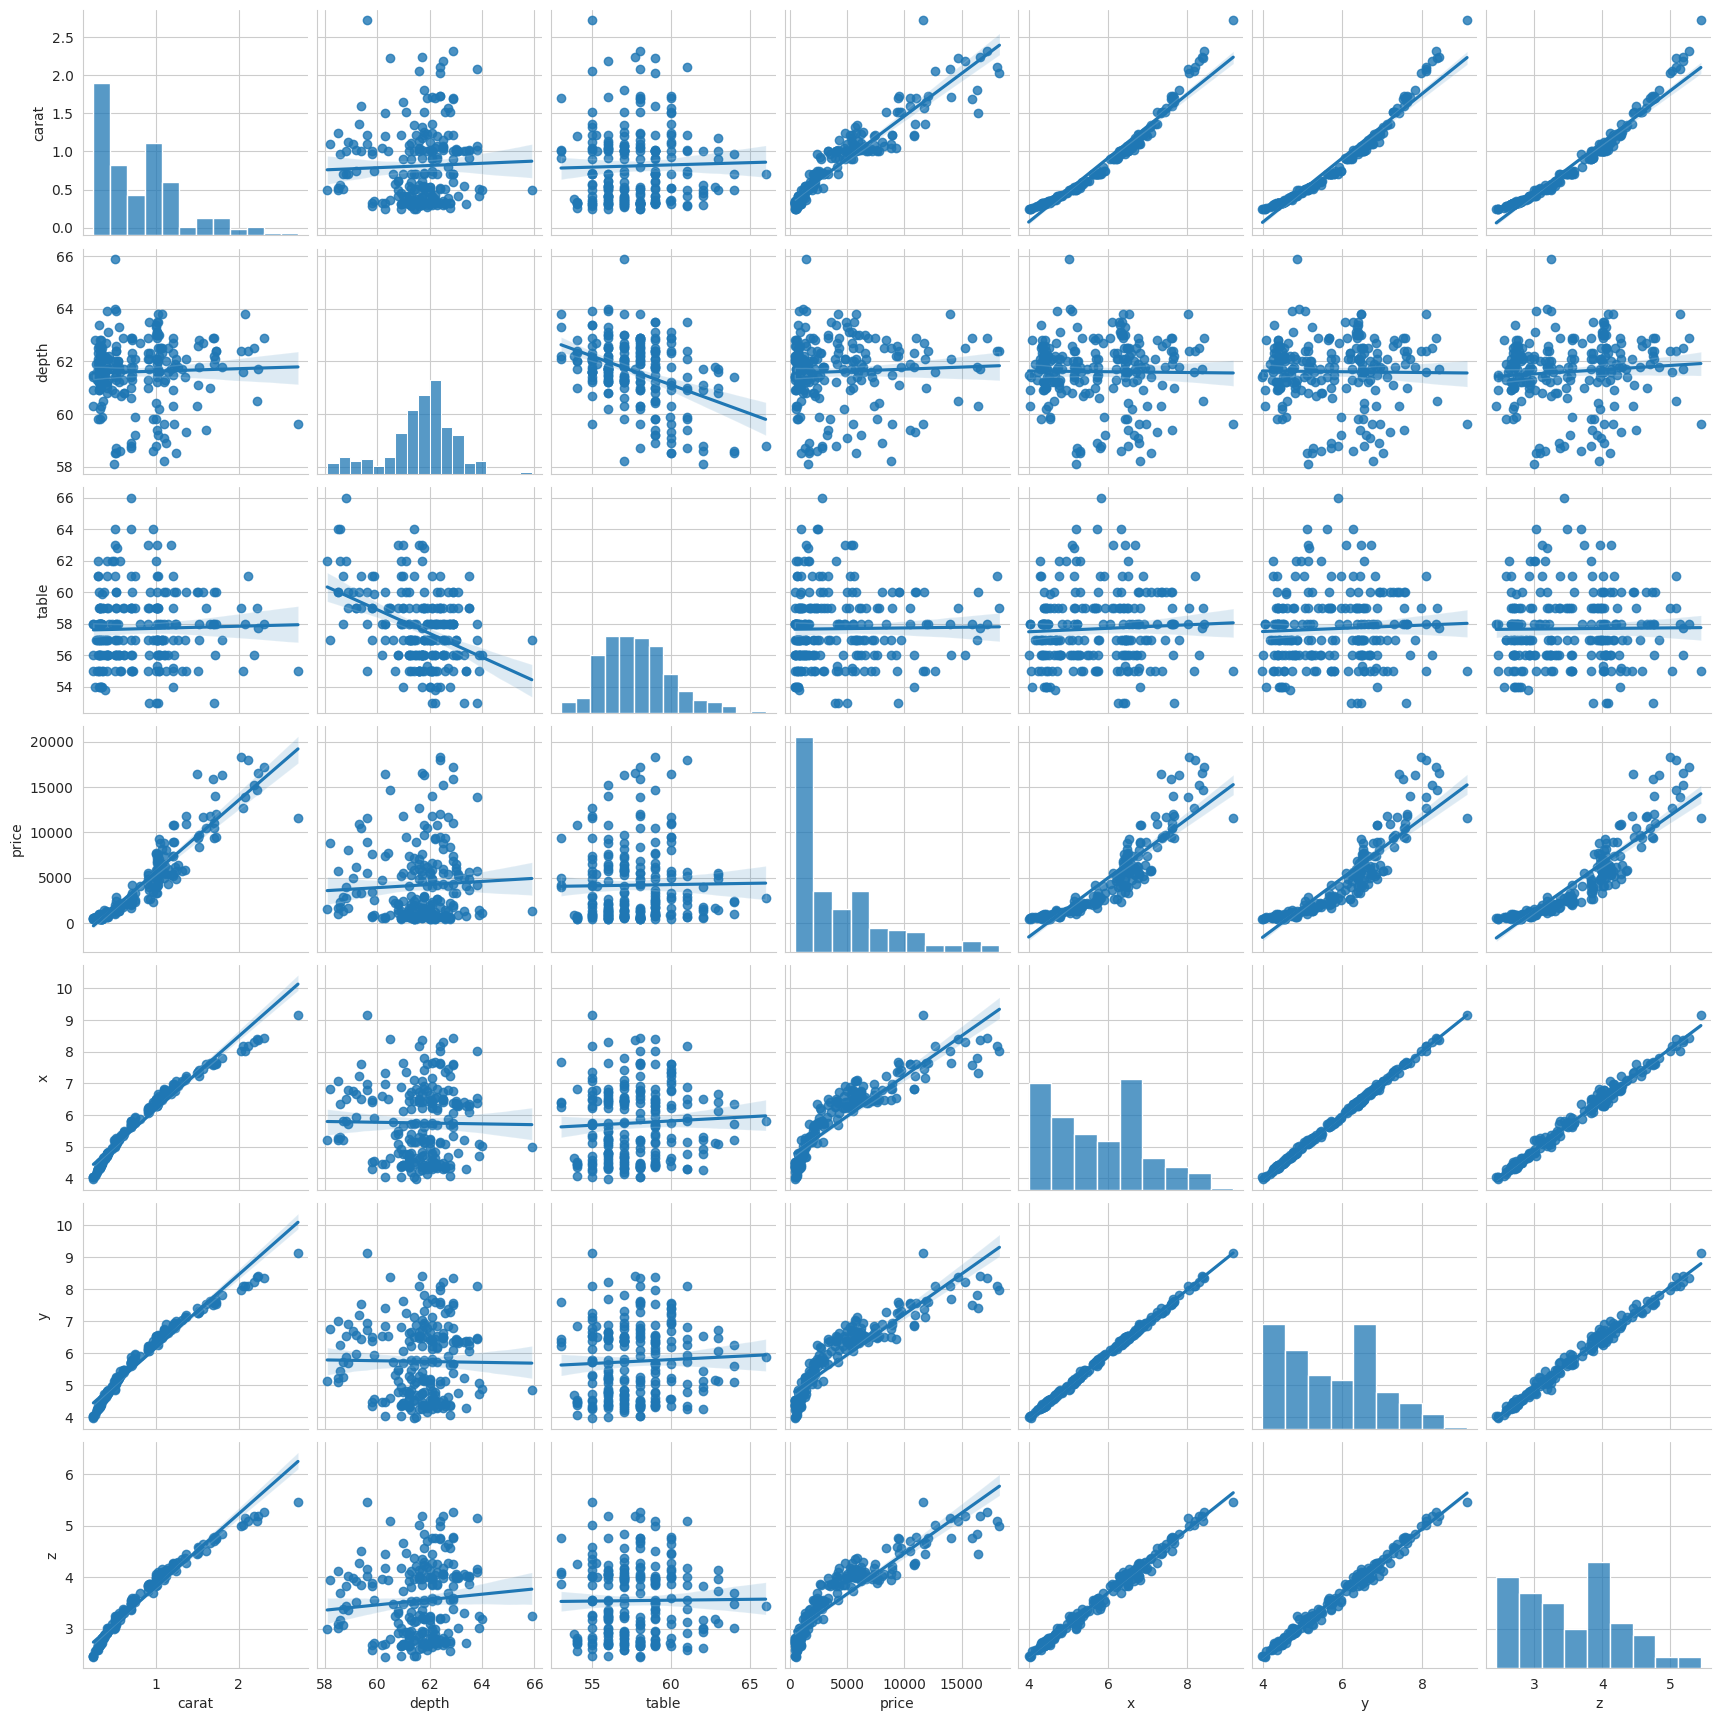

In [ ]:
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
# with regression
sns.pairplot(dataframe, kind="reg")
plt.show()

Interpretation :It can be concluded that most variables in our dataset exhibit a linear relationship with each other. This finding allows us to consider constructing a regression model for predicting prices.

# **I**-***Descriptive Statistics***

In this section, we will focus on preparing and processing our dataset by conducting some descriptive analyses.

To study the relationships between the quantitative variables in this study, we can use a correlation matrix. This statistical tool measures the strength and direction of a linear relationship between two variables. By displaying all possible correlations between the quantitative variables in a single table, the correlation matrix provides a clear and comprehensive visual representation.

**A correlation matrix for all three quantitative variables.**

<Axes: >

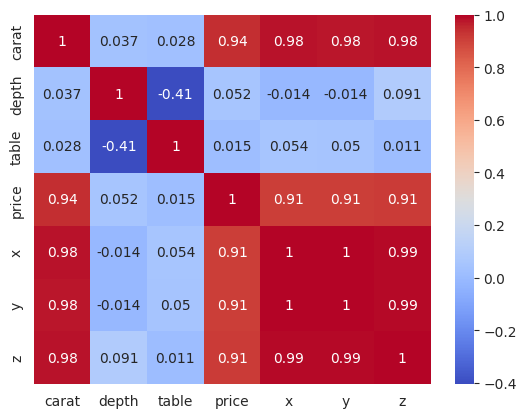

In [ ]:
data1=dataframe
corr_matrix = data1[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
# Importer pandas
import pandas as pd

# Sélectionner les variables continues
variables_continues = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Calculer la matrice de corrélation
corr_matrix = dataframe[variables_continues].corr()

# Afficher la matrice de corrélation
print(corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.036820  0.027954  0.939825  0.978363  0.977284  0.978087
depth  0.036820  1.000000 -0.405691  0.052316 -0.013810 -0.013911  0.091370
table  0.027954 -0.405691  1.000000  0.015299  0.054230  0.049638  0.011127
price  0.939825  0.052316  0.015299  1.000000  0.909180  0.909389  0.912361
x      0.978363 -0.013810  0.054230  0.909180  1.000000  0.998944  0.993982
y      0.977284 -0.013911  0.049638  0.909389  0.998944  1.000000  0.994048
z      0.978087  0.091370  0.011127  0.912361  0.993982  0.994048  1.000000



This is a correlation matrix, which shows the pairwise correlations between the variables listed in the table. The matrix indicates the following:

Carat has a strong positive correlation with Price (0.94) and a moderate positive correlation with X, Y, and Z dimensions (0.98 for all three).
Depth has a weak positive correlation with Price (0.05) and a moderate negative correlation with Table (-0.41).
Table has a weak positive correlation with Price (0.02) and a weak positive correlation with X dimension (0.05).
X, Y, and Z dimensions have strong positive correlations with each other (0.99) and moderate positive correlations with Price (0.91 to 0.93).

Focusing on the "price" column, we can see that it has the highest correlation with "carat" (0.94), followed by "x" (0.91), "y" (0.91), and "z" (0.91). This suggests that as the carat weight and dimensions of a diamond increase, the price also tends to increase.

The "depth" and "table" variables have relatively low correlation coefficients with "price" (0.05 and 0.02, respectively), indicating that they are not strong predictors of diamond price.

It's important to note that correlation does not imply causation, so we cannot conclude that changes in one variable are causing changes in the other variable based solely on the correlation coefficients.
In summary, this matrix suggests that Carat is the most important factor in determining Price, and that the dimensions (X, Y, Z) of the diamond are also strongly related to Price. The depth and table dimensions have weaker relationships with Price.


**Histograms of Price, Carat, Depth, and Table in Diamonds Dataset**

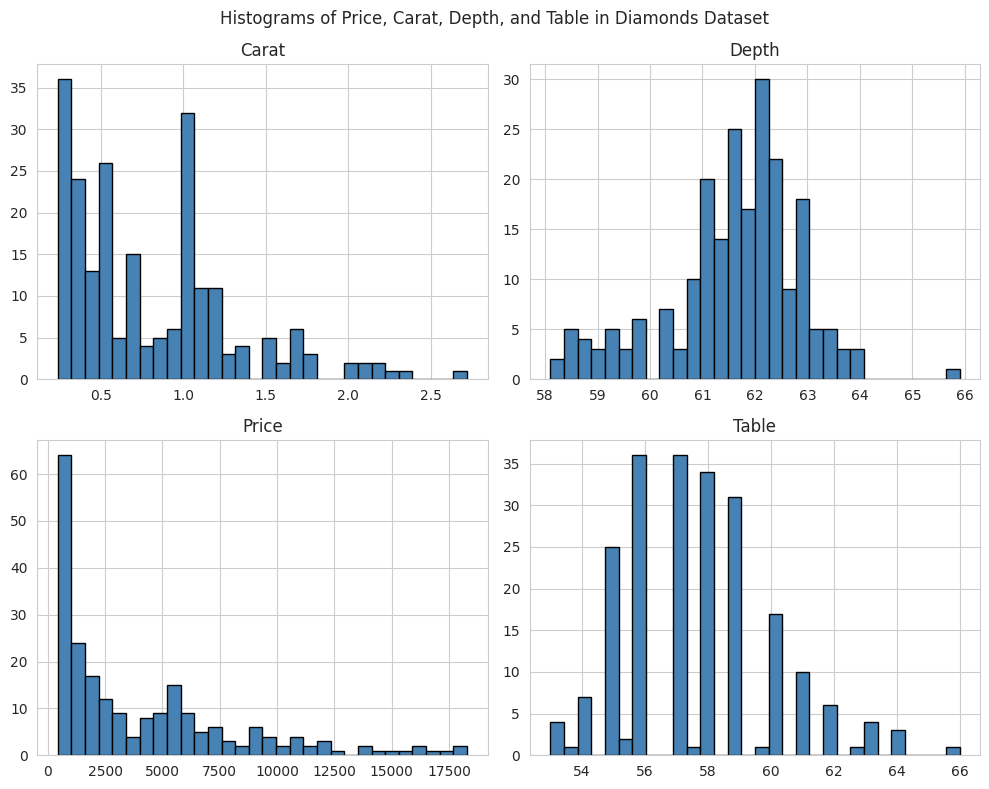

In [ ]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Extract data for each histogram
x1_data = dataframe['carat']
x2_data = dataframe['depth']
y1_data = dataframe['price']
y2_data = dataframe['table']

# Create histograms in each subplot
axs[0, 0].hist(x1_data, bins=30, color='steelblue', edgecolor='black')
axs[0, 0].set_title('Carat')
axs[0, 1].hist(x2_data, bins=30, color='steelblue', edgecolor='black')
axs[0, 1].set_title('Depth')
axs[1, 0].hist(y1_data, bins=30, color='steelblue', edgecolor='black')
axs[1, 0].set_title('Price')
axs[1, 1].hist(y2_data, bins=30, color='steelblue', edgecolor='black')
axs[1, 1].set_title('Table')

# Set overall title for the subplot grid
fig.suptitle('Histograms of Price, Carat, Depth, and Table in Diamonds Dataset')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The distribution of the variables 'carat' and 'price' is bimodal, which suggests that there are two distinct groups of diamonds.
while We observe that the variable 'depth' is unimodal.



---



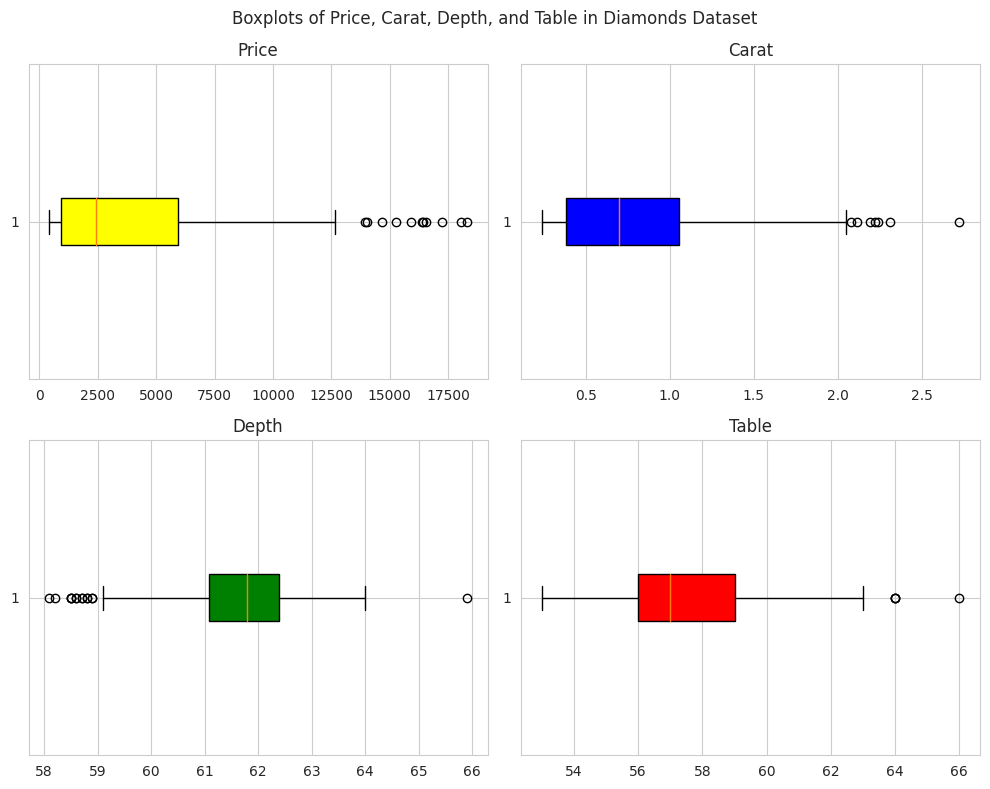

In [ ]:
import matplotlib.pyplot as plt

# Define the data for each boxplot
price_data = dataframe['price']
carat_data = dataframe['carat']
depth_data = dataframe['depth']
table_data = dataframe['table']

# Define custom colors for each box
colors = ['yellow', 'blue', 'green', 'red']

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create boxplots in each subplot with custom colors
axs[0, 0].boxplot(price_data, vert=False, patch_artist=True, boxprops=dict(facecolor=colors[0]))
axs[0, 0].set_title('Price')
axs[0, 1].boxplot(carat_data, vert=False, patch_artist=True, boxprops=dict(facecolor=colors[1]))
axs[0, 1].set_title('Carat')
axs[1, 0].boxplot(depth_data, vert=False, patch_artist=True, boxprops=dict(facecolor=colors[2]))
axs[1, 0].set_title('Depth')
axs[1, 1].boxplot(table_data, vert=False, patch_artist=True, boxprops=dict(facecolor=colors[3]))
axs[1, 1].set_title('Table')

# Set overall title for the subplot grid
fig.suptitle('Boxplots of Price, Carat, Depth, and Table in Diamonds Dataset')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()






Carat: The median carat weight of the diamonds is around 0.7, with the middle 50% of the data ranging from 0.38 to 1.05 carats. There are some outliers with carat weight above 2.7.

Depth: The median depth of the diamonds is around 61.8, with the middle 50% of the data ranging from 61.1 to 62.4. The range of the data is relatively small with no outliers.

Table: The median table percentage of the diamonds is around 57, with the middle 50% of the data ranging from 56 to 59. There are a few outliers with table percentages above 66.

Price: The median price of the diamonds is around 2442, with the middle 50% of the data ranging from 917.75 to 5952.25. There are some outliers with prices above 18286.


***Violin plots ***

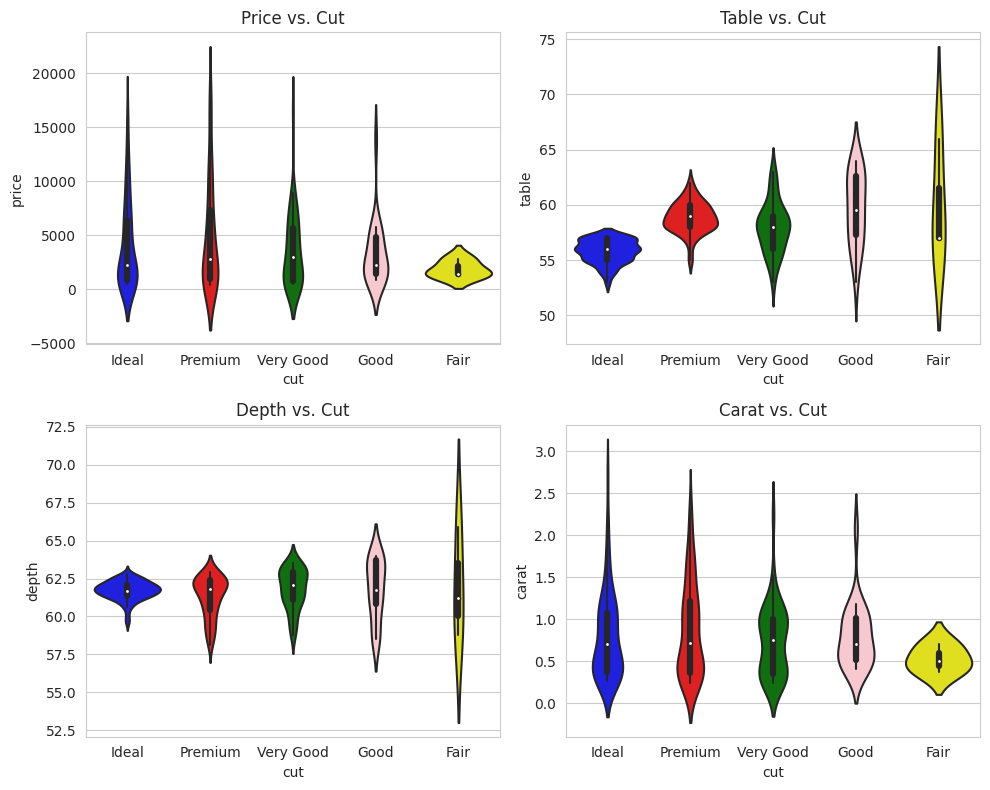

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define color palette for the graphs
palette = ['blue', 'red', 'green', 'pink', 'yellow']

# Create a figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Create a violin plot of price vs. cut
sns.violinplot(x='cut', y='price', data=dataframe, ax=axs[0, 0], palette=palette)
axs[0, 0].set_title('Price vs. Cut')

# Create a violin plot of table vs. cut
sns.violinplot(x='cut', y='table', data=dataframe, ax=axs[0, 1], palette=palette)
axs[0, 1].set_title('Table vs. Cut')

# Create a violin plot of depth vs. cut
sns.violinplot(x='cut', y='depth', data=dataframe, ax=axs[1, 0], palette=palette)
axs[1, 0].set_title('Depth vs. Cut')

# Create a violin plot of carat vs. cut
sns.violinplot(x='cut', y='carat', data=dataframe, ax=axs[1, 1], palette=palette)
axs[1, 1].set_title('Carat vs. Cut')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()

***Interpretation*** :When looking at the cut-price plot, most diamonds with a lower price are likely to have a lower quality cut, while those with a higher price are more likely to have a higher quality cut. However, there is a concentration of diamonds with all types of cuts in the price range of $0-5000.
In the cut-carat plot, diamonds with a lower carat weight are more likely to have a lower quality cut, while those with a higher carat weight are more likely to have a higher quality cut. However, there is a concentration of diamonds with all types of cuts in the carat range of 0-1.5.
The cut-depth plot shows that diamonds with an ideal, premium, or very good cut are likely to have a table value between 60-63, while those with a good or fair cut are more evenly distributed across all table values.
The cut-table plot reveals that diamonds with an ideal, premium, or very good cut are likely to have a table value between 55-60, while those with a good or fair cut are more evenly distributed across all table values.

---



***Bubble Plots:***

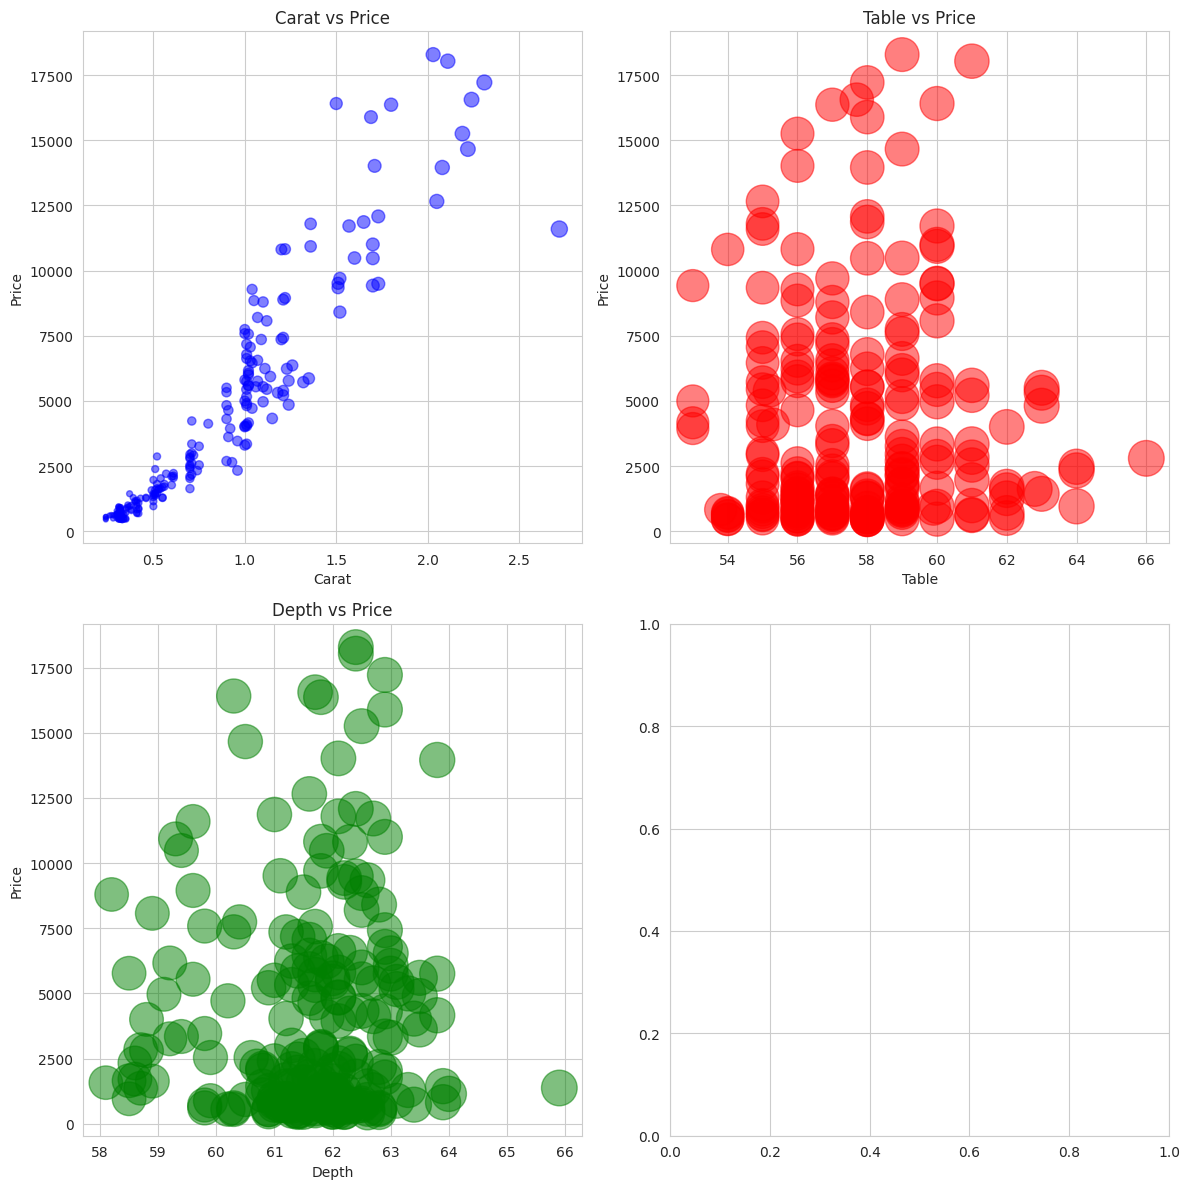

In [ ]:
import matplotlib.pyplot as plt

# Create a new DataFrame with necessary columns
dataframe_new = dataframe[['carat', 'table', 'depth', 'price']]

# Create separate scatter plots for each feature
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Carat vs Price
axs[0, 0].scatter(dataframe_new['carat'], dataframe_new['price'], s=dataframe_new['carat']*50, alpha=0.5, c='blue')
axs[0, 0].set_xlabel('Carat')
axs[0, 0].set_ylabel('Price')
axs[0, 0].set_title('Carat vs Price')

# Table vs Price
axs[0, 1].scatter(dataframe_new['table'], dataframe_new['price'], s=dataframe_new['table']*10, alpha=0.5, c='red')
axs[0, 1].set_xlabel('Table')
axs[0, 1].set_ylabel('Price')
axs[0, 1].set_title('Table vs Price')

# Depth vs Price
axs[1, 0].scatter(dataframe_new['depth'], dataframe_new['price'], s=dataframe_new['depth']*10, alpha=0.5, c='green')
axs[1, 0].set_xlabel('Depth')
axs[1, 0].set_ylabel('Price')
axs[1, 0].set_title('Depth vs Price')

# Adjust the layout of the subplots
plt.tight_layout()

# Display the figure
plt.show()















In [ ]:
# Compute the mean, median, standard deviation, minimum, and maximum of price_data
mean_price, median_price, std_price, min_price, max_price = price_data.mean(), price_data.median(), price_data.std(), price_data.min(), price_data.max()

# Compute the first, second, and third quartiles of the 'price' column of the dataframe
priceQ1, priceQ2, priceQ3 = np.quantile(dataframe['price'], [0.25, 0.5, 0.75])

# Compute the 95% confidence interval for the mean of the 'price' column of the dataframe
confidence_interval = sms.DescrStatsW(dataframe['price']).tconfint_mean(alpha=0.05)
lower_bound, upper_bound = confidence_interval

# Create a dictionary to store the computed statistics
stats_dict = {'Price Statistic': ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum','first quantile','second quantile','third quantile','Confidence intervall'],
              'Values': [mean_price, median_price, std_price, min_price, max_price, priceQ1, priceQ2, priceQ3, "[{:.4f}, {:.4f}]".format(lower_bound, upper_bound)]}

# Create a DataFrame from the dictionary
price_stats = pd.DataFrame.from_dict(stats_dict)

# Print the DataFrame
print(price_stats)

        Price Statistic                  Values
0                  Mean             4175.004545
1                Median                  2442.0
2    Standard Deviation             4159.642158
3               Minimum                     434
4               Maximum                   18286
5        first quantile                  917.75
6       second quantile                  2442.0
7        third quantile                 5952.25
8  Confidence intervall  [3622.2919, 4727.7172]


In [ ]:
mean_price = price_data.mean()
median_price = price_data.median()
std_price = price_data.std()
min_price = price_data.min()
max_price = price_data.max()
priceQ1 = np.quantile(dataframe['price'], 0.25)
priceQ2 = np.quantile(dataframe['price'], 0.50)
priceQ3 = np.quantile(dataframe['price'], 0.75)
# Calculate confidence interval
confidence_level = 0.95
confidence_interval = sms.DescrStatsW(dataframe['price']).tconfint_mean(alpha=1-confidence_level)
# Extract lower and upper bounds of the confidence interval
lower_bound = confidence_interval[0]
upper_bound = confidence_interval[1]
# Create a DataFrame to store the computed statistics
price_stats = pd.DataFrame({'Price Statistic': ['Mean', 'Median', 'Standard Deviation', 'Minimum', 'Maximum','first quantile','second quantile','third quantile','Confidence intervall'],
                           'Values': [mean_price, median_price, std_price, min_price, max_price,priceQ1,priceQ2,priceQ3,"[{:.4f}, {:.4f}]".format(lower_bound, upper_bound)]})

# Print the DataFrame
print(price_stats)

        Price Statistic                  Values
0                  Mean             4175.004545
1                Median                  2442.0
2    Standard Deviation             4159.642158
3               Minimum                     434
4               Maximum                   18286
5        first quantile                  917.75
6       second quantile                  2442.0
7        third quantile                 5952.25
8  Confidence intervall  [3622.2919, 4727.7172]


In [ ]:
import scipy.stats as stats

# Calculate descriptive statistics for 'depth'
depth_mean = dataframe['depth'].mean()
depth_std = dataframe['depth'].std(ddof=1)
depth_se = depth_std / np.sqrt(len(dataframe['depth']))
depth_ci = stats.t.interval(0.95, len(dataframe['depth'])-1, loc=depth_mean, scale=depth_se)[1] - depth_mean

depth_q1 = np.quantile(dataframe['depth'], 0.25)
depth_q2 = np.quantile(dataframe['depth'], 0.50)
depth_q3 = np.quantile(dataframe['depth'], 0.75)

# Print the results
print("Descriptive statistics for 'depth':")
print("Mean: {:.2f}".format(depth_mean))
print("Confidence interval for the mean: [{:.2f}, {:.2f}]".format(depth_mean - depth_ci, depth_mean + depth_ci))
print("Standard deviation: {:.2f}".format(depth_std))
print("Standard error: {:.2f}".format(depth_se))
print("First quartile: {:.2f}".format(depth_q1))
print("Second quartile (median): {:.2f}".format(depth_q2))
print("Third quartile: {:.2f}".format(depth_q3))

Descriptive statistics for 'depth':
Mean: 61.61
Confidence interval for the mean: [61.44, 61.78]
Standard deviation: 1.27
Standard error: 0.09
First quartile: 61.08
Second quartile (median): 61.80
Third quartile: 62.40


In [ ]:
import scipy.stats as stats

# Calculate descriptive statistics for 'carat'
carat_mean = dataframe['carat'].mean()
carat_std = dataframe['carat'].std(ddof=1)
carat_se = depth_std / np.sqrt(len(dataframe['carat']))
carat_ci = stats.t.interval(0.95, len(dataframe['carat'])-1, loc=carat_mean, scale=carat_se)[1] - carat_mean

carat_q1 = np.quantile(dataframe['carat'], 0.25)
carat_q2 = np.quantile(dataframe['carat'], 0.50)
carat_q3 = np.quantile(dataframe['carat'], 0.75)

# Print the results
print("Descriptive statistics for 'carat':")
print("Mean: {:.2f}".format(carat_mean))
print("Confidence interval for the mean: [{:.2f}, {:.2f}]".format(carat_mean - carat_ci, carat_mean + carat_ci))
print("Standard deviation: {:.2f}".format(carat_std))
print("Standard error: {:.2f}".format(carat_se))
print("First quartile: {:.2f}".format(carat_q1))
print("Second quartile (median): {:.2f}".format(carat_q2))
print("Third quartile: {:.2f}".format(carat_q3))


Descriptive statistics for 'carat':
Mean: 0.81
Confidence interval for the mean: [0.64, 0.98]
Standard deviation: 0.50
Standard error: 0.09
First quartile: 0.38
Second quartile (median): 0.70
Third quartile: 1.05


In [ ]:
import scipy.stats as stats

# Calculate descriptive statistics for 'table'
table_mean = dataframe['table'].mean()
table_std = dataframe['table'].std(ddof=1)
table_se = table_std / np.sqrt(len(dataframe['table']))
table_ci = stats.t.interval(0.95, len(dataframe['table'])-1, loc=table_mean, scale=table_se)[1] - table_mean

table_q1 = np.quantile(dataframe['table'], 0.25)
table_q2 = np.quantile(dataframe['table'], 0.50)
table_q3 = np.quantile(dataframe['table'], 0.75)

# Print the results
print("Descriptive statistics for 'table':")
print("Mean: {:.2f}".format(table_mean))
print("Confidence interval for the mean: [{:.2f}, {:.2f}]".format(table_mean - table_ci, table_mean + table_ci))
print("Standard deviation: {:.2f}".format(table_std))
print("Standard error: {:.2f}".format(table_se))
print("First quartile: {:.2f}".format(table_q1))
print("Second quartile (median): {:.2f}".format(table_q2))
print("Third quartile: {:.2f}".format(table_q3))

Descriptive statistics for 'table':
Mean: 57.69
Confidence interval for the mean: [57.37, 58.00]
Standard deviation: 2.35
Standard error: 0.16
First quartile: 56.00
Second quartile (median): 57.00
Third quartile: 59.00


# ***II***-***Gradient descent***

We start by visualizing our data, taking depth and carat as a function of price.

In [ ]:
#Standardize the data
features = dataframe[['carat', 'depth']].values
features_mean = np.mean(features, axis=0)
features_std = np.std(features, axis=0)
features_norm = (features - features_mean) / features_std
target = dataframe['price'].values
target_mean = np.mean(target)
target_std = np.std(target)
target_norm = (target - target_mean) / target_std

In [ ]:
# Add a column of ones to features_norm
features_norm = np.insert(features_norm, 0, 1, axis=1)

# After inserting a column of ones at the beginning of the numpy array "features_norm", the array will have a new shape of (n_samples, n_features+1), where n_samples represents the number of samples and n_features represents the number of features in the original array before the additional column of ones was inserted.
print(features_norm.shape)

(220, 3)


In [ ]:
# Generate duplicates of features_norm and target_norm
features_norm_b = features_norm.copy()
target_norm_b = target_norm.copy()

# Display the shape of features_norm_b
print(features_norm_b.shape)

(220, 3)


In [ ]:
# Splitting features_norm and target_norm into training and testing sets
features_norm_btrain, features_norm_btest, target_norm_btrain, target_norm_btest = train_test_split(features_norm_b,target_norm_b, test_size=0.2, random_state=42)


***Batch Gradient Descent***

Batch gradient descent is a technique to optimize the parameters of a model by iteratively updating them based on the gradients of the cost function with respect to the parameters. It uses the entire training dataset at each iteration to compute the gradients. Although this method requires more computation time for each iteration, it can produce a more precise estimate of the optimal parameters. This algorithm is also known as batch optimization because it updates the parameters after processing all training samples.

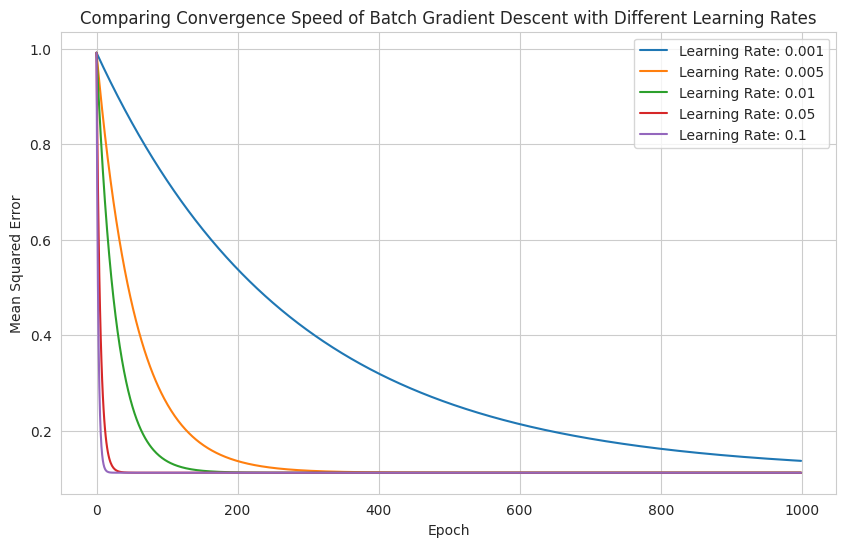

In [ ]:
def batch_gd(features, target,learning_rate=0.01, n_iterations=1000):
    m = len(target)
    n_features = features.shape[1]
    theta = np.zeros(n_features)
    convergence_speed = []

    for iteration in range(n_iterations):
      predictions = features.dot(theta)
      errors = predictions - target
      gradients = (2/m) * features.T.dot(errors)
      theta = theta - learning_rate * gradients
      mse = np.mean(errors ** 2)
      convergence_speed.append(mse)

    return theta, convergence_speed

learning_rates_b = [0.001, 0.005, 0.01, 0.05, 0.1]
convergence_speeds = []

for lr in learning_rates_b:
    theta, convergence_speed = batch_gd(features_norm_btrain, target_norm_btrain, learning_rate=lr)
    convergence_speeds.append(convergence_speed)

plt.figure(figsize=(10, 6))
for i in range(len(learning_rates_b)):
  plt.plot(range(1000), convergence_speeds[i], label='Learning Rate: {}'.format(learning_rates_b[i]))

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Comparing Convergence Speed of Batch Gradient Descent with Different Learning Rates')
plt.legend()
plt.show()
plt.show()

The graph shows 5 decreasing curves (one for each learning rate) converging towards 0.

The lower the error value, the faster the algorithm converges to the optimal solution. We can also observe that higher learning rates lead to faster convergence speeds.

---



In [ ]:
learning_rates_b = [0.00001, 0.1,0.4]

results = []
for lr in learning_rates_b:
    theta, cv = batch_gd(features_norm_btrain, target_norm_btrain, learning_rate=lr)
    results.append((theta, cv))

theta_b0, cv0 = results[0]
theta_b1, cv1 = results[1]
theta_b2, cv2 = results[2]


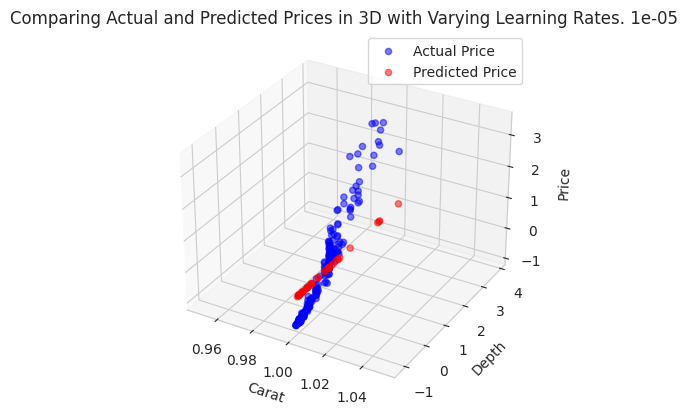

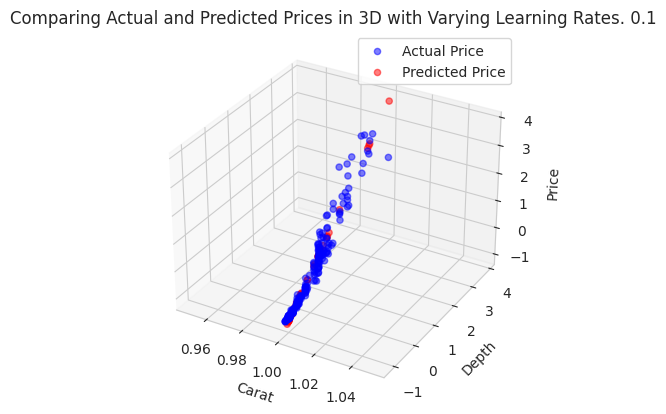

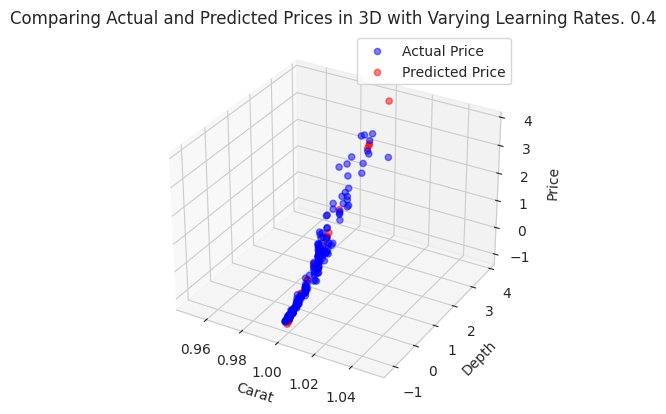

In [ ]:
learning_rates = [0.00001, 0.1, 0.4]

for i, rate in enumerate(learning_rates):
    # Run batch gradient descent for current learning rate
    theta_b, cv = batch_gd(features_norm_btrain, target_norm_btrain, learning_rate=rate)

    # Predict on the test set
    target_norm_bpred = np.dot(features_norm_btest, theta_b)

    # Create a 3D scatter plot of carat, depth, and price
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(features_norm_b[:, 0], features_norm_b[:, 1], target_norm_b, c='b', label='Actual Price', alpha=0.5)
    ax.scatter(features_norm_btest[:, 0], features_norm_btest[:, 1], target_norm_bpred, c='r', label='Predicted Price', alpha=0.5)
    ax.set_xlabel('Carat')
    ax.set_ylabel('Depth')
    ax.set_zlabel('Price')
    ax.set_title(f'Comparing Actual and Predicted Prices in 3D with Varying Learning Rates. {rate}')
    ax.legend()
    plt.show()

The code performs multiple linear regression using batch gradient method to predict the price of diamonds based on two variables: carat and depth. Then, it generates three 3D plots to compare the actual prices with the predicted prices using different learning rates (0.00001, 0.1, and 0.4). The plots reveal that the model has a better prediction performance with a learning rate of 0.1 and a less satisfactory performance with learning rates of 0.00001 or 0.4.

***Mini Batch Gradient Descent ***

Mini-batch gradient descent is an optimization algorithm commonly used in machine learning to update the parameters of a model. In contrast to batch gradient descent, which computes the gradient of the cost function over the entire training set, mini-batch gradient descent computes the gradient over a small random subset of the training set, called a mini-batch.

In [ ]:
features_norm_copy = np.copy(features_norm)
target_norm_copy = np.copy(target_norm)

features_norm_mb = features_norm_copy
target_norm_mb = target_norm_copy

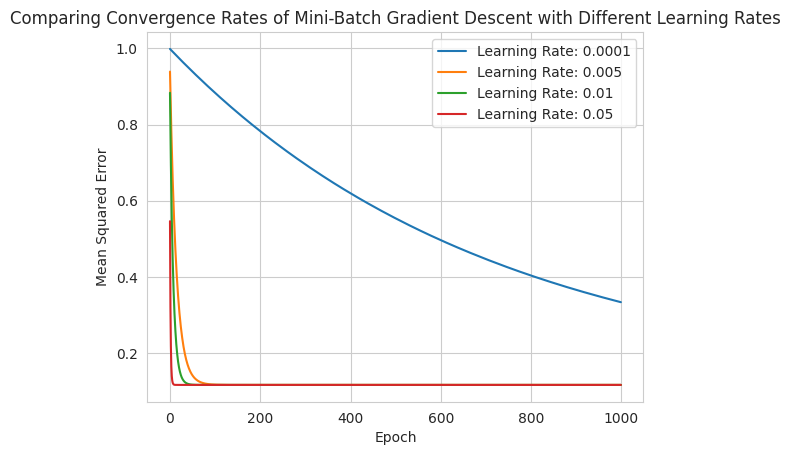

In [ ]:
def mini_batch_gradient_descent(features_norm, target_norm, batch_size, num_epochs, learning_rate):
    # Initialize the model weights
    theta = np.zeros(features_norm.shape[1])

    # Create mini-batches from training data
    num_batches = features_norm.shape[0] // batch_size
    if features_norm.shape[0] % batch_size != 0:
        num_batches += 1

    # List to store loss values at each epoch
    errors = []

    # Training loop
    for epoch in range(num_epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(features_norm.shape[0])
        features_norm_shuffled = features_norm[shuffle_indices]
        target_norm_shuffled = target_norm[shuffle_indices]

        # Loop over mini-batches
        for batch in range(num_batches):
            # Extract mini-batch
            start_idx = batch * batch_size
            end_idx = min(start_idx + batch_size, features_norm.shape[0])
            features_norm_batch = features_norm_shuffled[start_idx:end_idx]
            target_norm_batch = target_norm_shuffled[start_idx:end_idx]

            # Compute predicted values
            target_norm_pred_batch = features_norm_batch @ theta

            # Compute gradients
            gradient = np.dot(features_norm_batch.T, (target_norm_pred_batch - target_norm_batch)) / features_norm_batch.shape[0]

            # Update weights
            theta -= learning_rate * gradient

        # Compute error for this epoch
        target_norm_pred_train = features_norm @ theta
        mse = np.mean((target_norm_pred_train - target_norm) ** 2)
        errors.append(mse)

    return theta, errors

# Define the mini-batch size
batch_size = 32

# Set the number of epochs
num_epochs = 1000

# Define the learning rates to test
learning_rates = [0.0001, 0.005,0.01,0.05]

# List to store the final error for each learning rate
final_errors = []

# Loop over the learning rates
for learning_rate in learning_rates:
    # Call the mini-batch gradient descent function
    theta, errors = mini_batch_gradient_descent(features_norm_copy, target_norm_copy, batch_size, num_epochs, learning_rate)
    final_errors.append(errors[-1])

    # Plot the error curve for this learning rate
    plt.plot(errors, label=f'Learning Rate: {learning_rate}')

# Plot settings
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Comparing Convergence Rates of Mini-Batch Gradient Descent with Different Learning Rates')
plt.show()

***Interpretation :***The code implements a linear regression algorithm using the mini-batch gradient descent method. To begin with, it splits the data into two sets, one for training the model and the other for testing its performance. Then, it normalizes the data features to facilitate the model training.

Once the data is prepared, the code uses a loop to train the model on the mini-batches of training data. At each step, it calculates the mean squared error (MSE) using the model predictions and the actual values, and then uses backpropagation to update the model weights. This step is repeated for each mini-batch until the model achieves satisfactory convergence.

Finally, the model is tested on the test set to evaluate its performance. The obtained results allow measuring the effectiveness of the model and adjusting its parameters to improve its performance.

***Optimal gradient descent***

Optimal step descent is a variant of gradient descent where the learning rate is not fixed but is adapted at each iteration. The goal is to choose the step size that minimizes the cost function the most. At each iteration, the algorithm calculates the gradient of the cost function and then performs a line search to determine the optimal learning rate. This approach can converge faster than standard gradient descent since it adjusts the step size based on the local curvature of the cost function.

In [ ]:
def opt_gradient_descent(features, target, learning_rate=0.01, decay_rate=0.1, n_iterations=1000):
    m = len(target)
    n_features = features.shape[1]
    theta = np.zeros(n_features)
    convergence_speed = []

    for iteration in range(n_iterations):
        predictions = features.dot(theta)
        errors = predictions - target
        gradients = (2/m) * features.T.dot(errors)
        prev_theta = np.copy(theta)

        # Update theta with optimal learning rate
        for i in range(n_features):
            theta[i] = theta[i] - learning_rate * gradients[i]
        mse = np.mean(errors ** 2)
        convergence_speed.append(mse)

        # Compute new learning rate using decay rate
        if iteration % 50 == 0:
            learning_rate = learning_rate * (1 / (1 + decay_rate * iteration))

        # Check for convergence
        if np.allclose(theta, prev_theta):
            print(f"Converged after {iteration} iterations.")
            break

    return theta, convergence_speed

Converged after 201 iterations.
Converged after 201 iterations.
Converged after 151 iterations.
Converged after 151 iterations.
Converged after 51 iterations.


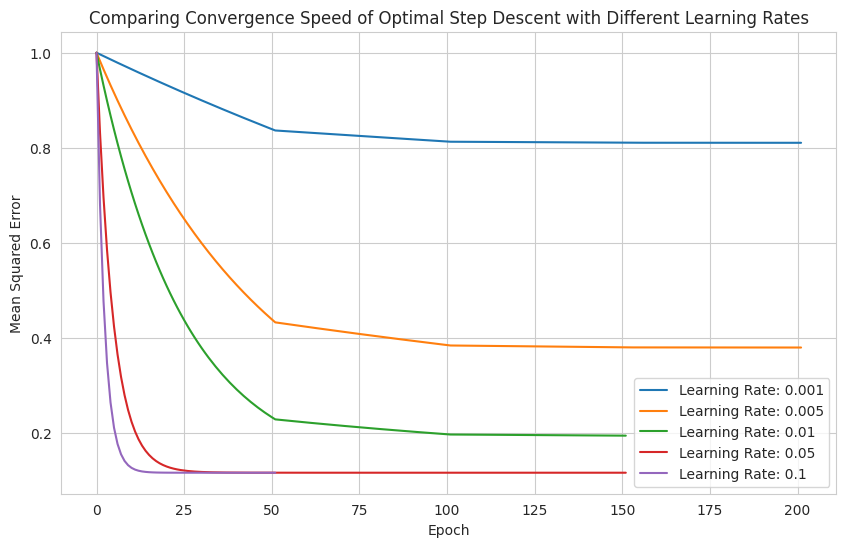

In [ ]:
learning_rates_opt = [0.001, 0.005, 0.01, 0.05, 0.1]
convergence_speeds_opt = []

for lr in learning_rates_opt:
    theta, convergence_speed_opt = opt_gradient_descent(features_norm_copy, target_norm_copy, learning_rate=lr)
    convergence_speeds_opt.append(convergence_speed_opt)

plt.figure(figsize=(10, 6))
for i in range(len(learning_rates_opt)):
    plt.plot(range(len(convergence_speeds_opt[i])), convergence_speeds_opt[i], label='Learning Rate: {}'.format(learning_rates_opt[i]))

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Comparing Convergence Speed of Optimal Step Descent with Different Learning Rates')
plt.legend()
plt.show()


This code performs gradient descent with different learning rates on a normalized set of features and target. The convergence speed of each learning rate is plotted on a graph for comparison.

The output of the code indicates the number of iterations it took for the algorithm to converge (i.e., for the change in theta to be small enough that it is considered to have reached the minimum). The number of iterations needed for convergence varies with the learning rate used. For example, the algorithm converged after 201 iterations when a learning rate of 0.001 was used, after 151 iterations when a learning rate of 0.005 or 0.01 was used, and after 51 iterations when a learning rate of 0.1 was used.

Overall, the plot shows that smaller learning rates converge more slowly but are less likely to overshoot the minimum, while larger learning rates converge more quickly but are more likely to overshoot the minimum and fail to converge. Therefore, it is important to choose an appropriate learning rate for the problem at hand to balance convergence speed and accuracy.

***Stochastic gradient descent***

Stochastic gradient descent (SGD) is a popular optimization algorithm used in machine learning and deep learning. It is a variation of gradient descent in which the parameters of a model are updated incrementally for each training example, rather than updating the parameters for the entire dataset all at once. SGD is particularly useful when dealing with large datasets, as it allows the optimization to be performed efficiently on a single example or a small batch of examples at a time.

In [ ]:
def stochastic_gradient_descent(features, target, learning_rate=0.01, n_epochs=100):
    # Initialisation des paramètres
    n_samples, n_features = features.shape
    theta = np.zeros(n_features)
    mse_history = []

    # Boucle sur les époques
    for epoch in range(n_epochs):
        # Mélange aléatoire des indices d'échantillon
        indices = np.random.permutation(n_samples)

        # Boucle sur les échantillons
        for i in indices:
            # Calcul de la prédiction pour l'échantillon i
            xi = features[i]
            yi = target[i]
            prediction = np.dot(xi, theta)

            # Calcul de l'erreur pour l'échantillon i
            error = prediction - yi

            # Mise à jour des paramètres
            gradient = xi * error
            theta -= learning_rate * gradient

        # Calcul de l'erreur quadratique moyenne pour la dernière époque
        predictions = np.dot(features, theta)
        mse = np.mean((predictions - target) ** 2)
        mse_history.append(mse)

    return theta, mse_history

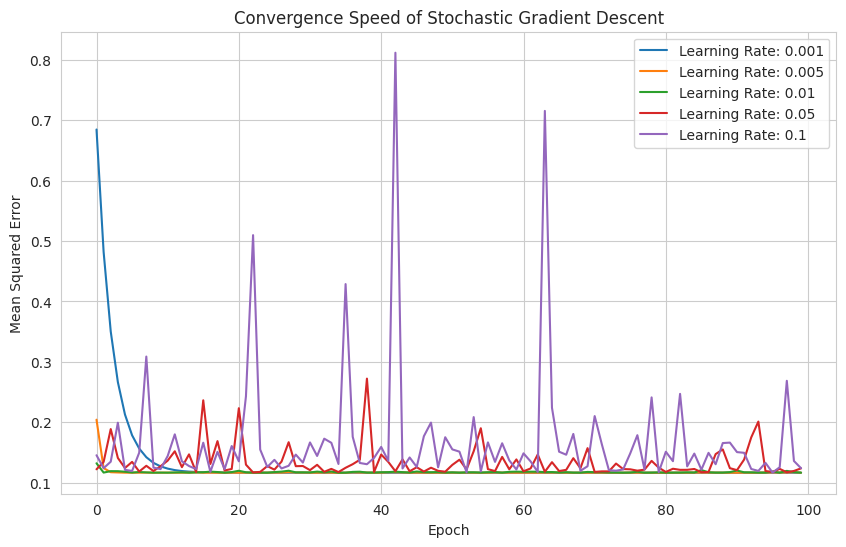

In [ ]:
learning_rates_bs = [0.001, 0.005, 0.01, 0.05, 0.1]
convergence_speeds_sto = []

for lr in learning_rates_bs:
    theta, convergence_speed_sto = stochastic_gradient_descent(features_norm_copy, target_norm_copy, learning_rate=lr)
    convergence_speeds_sto.append(convergence_speed_sto)

plt.figure(figsize=(10, 6))
for i in range(len(learning_rates_bs)):
    plt.plot(range(len(convergence_speeds_sto[i])), convergence_speeds_sto[i], label='Learning Rate: {}'.format(learning_rates_bs[i]))

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Convergence Speed of Stochastic Gradient Descent')
plt.legend()
plt.show()



***Interpretaation :***When using the stochastic gradient descent method, the learning process is performed on individual samples or random subsets of the dataset, instead of the entire dataset at once. This approach can significantly reduce computation time and often results in faster convergence to a local minimum. However, the stochastic nature of the method can lead to greater fluctuation in the cost over time. In summary, the stochastic method represents a trade-off between efficiency and accuracy.

***Percpetron***

A perceptron is a type of artificial neural network that is designed to perform binary classification tasks. It consists of a single layer of artificial neurons, each of which receives input values, applies weights to them, and passes the result through an activation function to produce an output.

The perceptron training algorithm works by iteratively adjusting the weights of the inputs until the model produces the desired output for a given set of inputs. This process is repeated for multiple epochs until the model has learned to accurately classify the training data.

In [ ]:
features_p=np.copy(features)
target_p=np.copy(target)

In [ ]:
# Convert featuress and target to PyTorch tensors
features_pt = torch.tensor(features_p, dtype=torch.float32)
target_pt = torch.tensor(target_p, dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Single-Layer Perceptron (SLP) model
class SLP(nn.Module):
    def __init__(self, input_dim):
        super(SLP, self).__init__()
        self.fc = nn.Linear(input_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

# Define the SLP model
input_dim = 3  # Input dimension of X
model = SLP(input_dim)

# Define the Mean Squared Error (MSE) loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 1000  # Number of epochs
for epoch in range(num_epochs):
    # Forward pass
    inputs = torch.randn(1, input_dim) # generate random input tensor
    outputs = model(inputs)

    # Compute the loss
    loss = criterion(outputs, torch.zeros(1, 1)) # use a target tensor of all zeros

    # Backward pass
    optimizer.zero_grad()
    loss.backward()

    # Update the weights
    optimizer.step()

    # Print the loss for this epoch
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/1000], Loss: 0.4403
Epoch [2/1000], Loss: 0.5403
Epoch [3/1000], Loss: 0.2263
Epoch [4/1000], Loss: 0.5588
Epoch [5/1000], Loss: 0.2502
Epoch [6/1000], Loss: 0.6244
Epoch [7/1000], Loss: 0.3604
Epoch [8/1000], Loss: 0.3382
Epoch [9/1000], Loss: 0.4084
Epoch [10/1000], Loss: 0.4288
Epoch [11/1000], Loss: 0.0954
Epoch [12/1000], Loss: 0.4103
Epoch [13/1000], Loss: 0.3728
Epoch [14/1000], Loss: 0.1223
Epoch [15/1000], Loss: 0.3591
Epoch [16/1000], Loss: 0.3668
Epoch [17/1000], Loss: 0.1970
Epoch [18/1000], Loss: 0.2986
Epoch [19/1000], Loss: 0.2456
Epoch [20/1000], Loss: 0.3002
Epoch [21/1000], Loss: 0.2591
Epoch [22/1000], Loss: 0.2140
Epoch [23/1000], Loss: 0.2991
Epoch [24/1000], Loss: 0.2464
Epoch [25/1000], Loss: 0.3131
Epoch [26/1000], Loss: 0.2847
Epoch [27/1000], Loss: 0.1347
Epoch [28/1000], Loss: 0.1181
Epoch [29/1000], Loss: 0.1861
Epoch [30/1000], Loss: 0.1572
Epoch [31/1000], Loss: 0.1722
Epoch [32/1000], Loss: 0.2905
Epoch [33/1000], Loss: 0.2381
Epoch [34/1000], Lo

This code trains a Single-Layer Perceptron (SLP) model using Stochastic Gradient Descent (SGD) to minimize Mean Squared Error (MSE) loss. The input dimension of X is 3, and the model has one output unit.

The training loop runs for 1000 epochs. In each epoch, a random input tensor is generated, and the output of the model is computed using the forward method. Then, the MSE loss is calculated between the model output and a target tensor of all zeros.

In the backward pass, the gradients are computed using the loss tensor and the backward method. Then, the optimizer's gradients are zeroed using the zero_grad method, and the weights are updated using the step method.

Finally, the loss for the current epoch is printed, and the loop continues for the next epoch.

The output shows the loss decreasing over time, indicating that the model is learning to minimize the MSE loss.

***Decision tree***

A decision tree is a model used for predicting outcomes based on a set of input features or characteristics. It is a tree-like structure where each internal node represents a test on an input feature and each branch represents the outcome of that test. The leaves of the tree represent the final predictions of the model for different combinations of input features.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features_d=np.copy(features)
target_d=np.copy(target)
# Split the data into training and testing sets
features_dtrain, features_dtest, target_dtrain, target_dtest = train_test_split(features_d, target_d, test_size=0.2, random_state=42)

# Create the decision tree regression model
model_d = DecisionTreeRegressor(max_depth=5)

# Fit the model on the training data
model_d.fit(features_dtrain, target_dtrain)

# Predict on the test data
target_pred_d = model_d.predict(features_dtest)

# Evaluate the performance of the model
mse_d = mean_squared_error(target_dtest, target_pred_d)
print('Mean squared error:', mse_d)


Mean squared error: 982325.2346899103


RMSE: 1487.162375740518
Feature importances: [0.94160646 0.02379315 0.03460039]


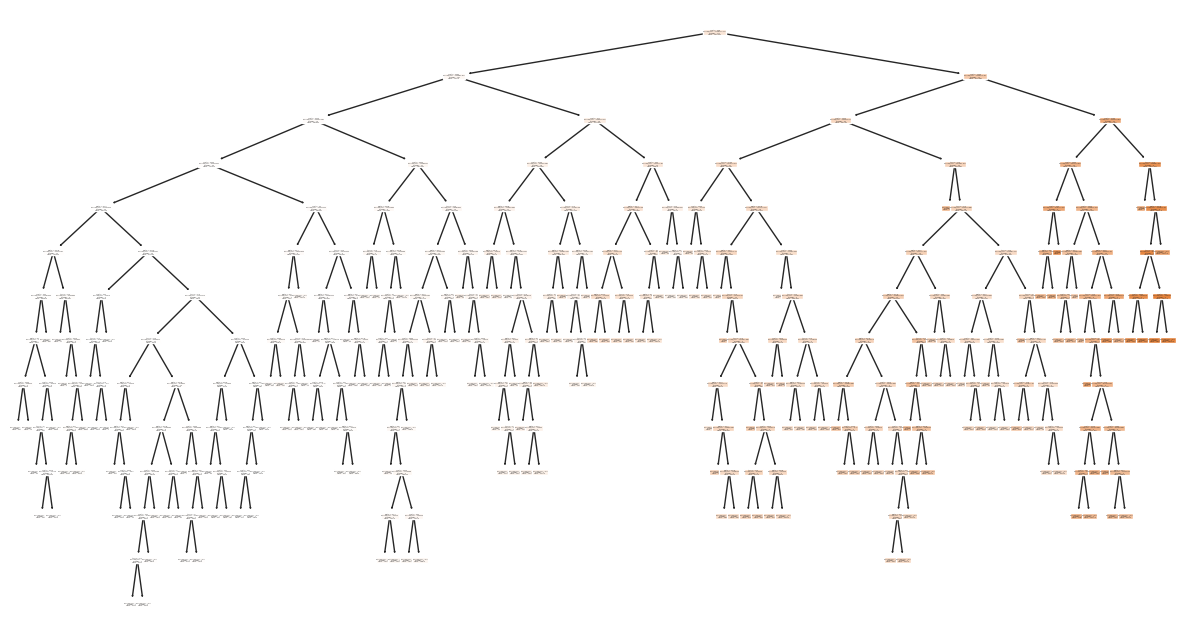

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Extract the variables of interest
X = dataframe[['carat', 'depth', 'table']]
y = dataframe['price']

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle d'arbre de décision
tree_reg = DecisionTreeRegressor(random_state=42)
# Entraîner le modèle sur l'ensemble d'entraînement
tree_reg.fit(X_train, y_train)
# Prédire les prix sur l'ensemble de test
y_pred = tree_reg.predict(X_test)
# Calculer la racine carrée de l'erreur quadratique moyenne
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Afficher la RMSE
print('RMSE:', rmse)

# Afficher l'importance de chaque variable
print('Feature importances:', tree_reg.feature_importances_)

# Visualiser l'arbre de décision
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 8))
plot_tree(tree_reg, filled=True, feature_names=X.columns)
plt.show()

The decision tree model is used to predict diamond prices based on certain characteristics such as carat, depth, and table. Each node in the tree represents a variable and a condition on that variable (for example, if the carat value is less than 0.5). The branches coming out of a node represent the different possible values of the tested variable. Ultimately, the leaves of the tree represent the model's predictions for different combinations of variable values. This information can help understand how the model makes decisions and how it can be improved for better predictions.

***Conclusion :*** Throughout this project, we have experimented with several powerful models in an attempt to solve our regression problem. We tested the performance of each model and analyzed how the cost function converged differently with different learning rates.

In particular, we found that the mini-batch gradient descent, stochastic gradient descent, decision tree, and neural network models all showed promising results. The mini-batch gradient descent method allowed for efficient optimization by updating the parameters based on small random subsets of the data. The stochastic gradient descent method, on the other hand, trained the model on individual samples and performed well in terms of both speed and accuracy.

The decision tree model proved to be a simple yet effective method for regression, as it was able to capture non-linear relationships and interactions between features.

Overall, this project allowed us to gain a deeper understanding of different regression models and how they can be optimized to achieve better results. By comparing the performance of these models, we were able to identify the most suitable approach for our specific problem.